Використовуючи бібліотеку keras завантажити набір даних MNIST.


In [1]:
import tensorflow.keras as keras
import sys
import pickle as cPickle
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import gzip

num_classes = 10
epochs = 20
 
# picture dimensions
img_rows, img_cols = 28, 28
 
# загружаем данные
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


1. Побудувати багатошаровий перцептрон засобами бібліотеки keras з різною кількістю шарів.
2. Проводячи обчислювальні експерименти визначити оптимальний набір гіперпараметрів нейронної мережі.
3. Результати всіх обчислювальних експериментів навести у звіті.

In [2]:
if K.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 2.3364 - accuracy: 0.0989 - val_loss: 2.2887 - val_accuracy: 0.1186
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.2403 - accuracy: 0.1469 - val_loss: 2.1919 - val_accuracy: 0.1822
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 2.1470 - accuracy: 0.2344 - val_loss: 2.0985 - val_accuracy: 0.2930
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 2.0576 - accuracy: 0.3422 - val_loss: 2.0092 - val_accuracy: 0.4020
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.9719 - accuracy: 0.4354 - val_loss: 1.9232 - val_accuracy: 0.4844
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8891 - accuracy: 0.5099 - val_loss: 1.8395 - val_accuracy: 0.5494
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8088 - accuracy: 0.5694 - val_loss: 1.7583 - val_accuracy: 0.6004
Epoch 

Text(0.5, 0, 'epoch')

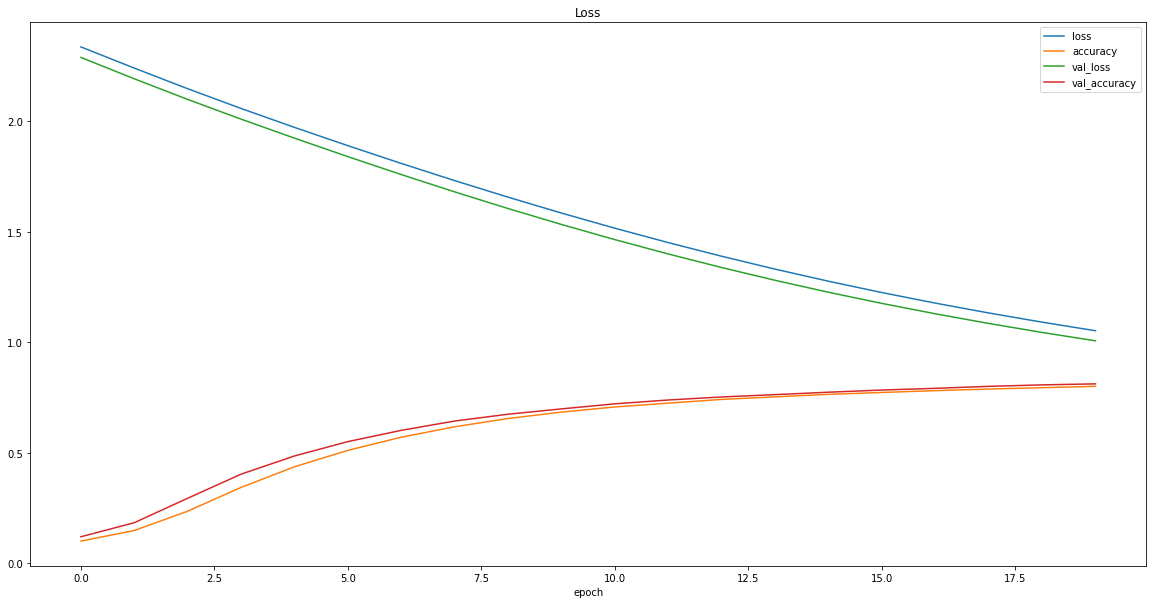

In [3]:
# convert to binary metrics
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# building a model
model = Sequential()
#добавляем слои
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
 

model.compile(loss=keras.losses.categorical_crossentropy,
          	optimizer=keras.optimizers.Adadelta(),
          	metrics=['accuracy'])


history = model.fit(x_train, y_train,
      	batch_size=128,
          epochs=epochs,
      	verbose=1,
          validation_data=(x_test, y_test)) 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.title('Loss')
plt.xlabel('epoch')